# Data Preprocessing
- Data cleaning and handling missing data
- Processing inclusion/exclusion criteria
- Process SNP inputs into SNVformer input
- Process covariates abd phenotype (y)
- Split dataset into train (90%) and test (10%)
- Scale and normalise for ML

### Modules

In [3]:
import pandas as pd #1.5.3
import numpy as np #1.20.3
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

### Globals

In [4]:
geno_path = "/gpfs/igmmfs01/eddie/UK-BioBank-proj19655/gzeng/python/preprocess/train_test_geno_input_8e-4.csv"
pheno_train_path = "/gpfs/igmmfs01/eddie/UK-BioBank-proj19655/gzeng/phenotypes/pheno_residuals_train.tsv"
pheno_test_path = "/gpfs/igmmfs01/eddie/UK-BioBank-proj19655/gzeng/phenotypes/pheno_residuals_test.tsv"
train_ids_path = "/gpfs/igmmfs01/eddie/UK-BioBank-proj19655/gzeng/preprocess_gwas/train_ids.txt"
test_ids_path = "/gpfs/igmmfs01/eddie/UK-BioBank-proj19655/gzeng/preprocess_gwas/test_ids.txt"

### Read inputs

In [5]:
geno = pd.read_csv(geno_path).iloc[:,1:] #Drop 1st column (row.ids)

In [6]:
geno.head()

#247 columns: 1x eid, 2x(121x snp ids + 2x additional duplicate variant)

,eid,rs61765003,rs61765003_pos,rs151307093,rs151307093_pos,rs144886388,rs144886388_pos,rs17476313,rs17476313_pos,rs6684189,...,rs7257888,rs7257888_pos,rs215561,rs215561_pos,rs71195846,rs71195846_pos,rs562562972,rs562562972_pos,rs5757279,rs5757279_pos
0,5514951,"('G', 'G')",14725873,"('C', 'C')",149501894,"('A', 'A')",164246170,"('C', 'T')",191089379,"('C', 'T')",...,"('T', 'A')",1956094522,"('G', 'A')",202797015,"('G', 'G')",203589626,"('T', 'TTTG')",2047629050,"('C', 'C')",2239168987
1,2212802,"('G', 'G')",14725873,"('C', 'C')",149501894,"('A', 'A')",164246170,"('C', 'T')",191089379,"('T', 'T')",...,"('A', 'A')",1956094522,"('G', 'A')",202797015,"('GA', 'GA')",203589626,"('T', 'TTTG')",2047629050,"('C', 'C')",2239168987
2,4736282,"('G', 'G')",14725873,"('C', 'C')",149501894,"('A', 'A')",164246170,"('C', 'T')",191089379,"('C', 'T')",...,"('T', 'T')",1956094522,"('G', 'A')",202797015,"('G', 'GA')",203589626,"('T', 'TTTG')",2047629050,"('C', 'C')",2239168987
3,4068571,"('G', 'G')",14725873,"('C', 'C')",149501894,"('A', 'A')",164246170,"('C', 'C')",191089379,"('T', 'T')",...,"('A', 'A')",1956094522,"('G', 'G')",202797015,"('G', 'G')",203589626,"('T', 'TTTG')",2047629050,"('C', 'C')",2239168987
4,3103104,"('G', 'G')",14725873,"('C', 'C')",149501894,"('A', 'A')",164246170,"('C', 'C')",191089379,"('T', 'T')",...,"('T', 'T')",1956094522,"('G', 'A')",202797015,"('G', 'G')",203589626,"('TTTG', 'TTTG')",2047629050,"('C', 'C')",2239168987


In [7]:
geno.describe()

,eid,rs61765003_pos,rs151307093_pos,rs144886388_pos,rs17476313_pos,rs6684189_pos,rs10875102_pos,rs141709414_pos,rs11509369_pos,rs11892025_pos,...,rs72936311_pos,rs1443334_pos,rs67671423_pos,rs28567442_pos,rs76060370_pos,rs7257888_pos,rs215561_pos,rs71195846_pos,rs562562972_pos,rs5757279_pos
count,3.375440e+05,337544.0,337544.0,337544.0,337544.0,337544.0,337544.0,3.375440e+05,337544.0,337544.0,...,3.375440e+05,3.375440e+05,3.375440e+05,3.375440e+05,3.375440e+05,3.375440e+05,337544.0,337544.0,3.375440e+05,3.375440e+05
mean,3.514949e+06,14725873.0,149501894.0,164246170.0,191089379.0,191093014.0,198159558.0,1.187529e+09,22424764.0,29453246.0,...,1.853578e+09,1.869841e+09,1.873054e+09,1.930930e+09,1.949910e+09,1.956095e+09,202797015.0,203589626.0,2.047629e+09,2.239169e+09
std,1.450945e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
min,-1.400000e+01,14725873.0,149501894.0,164246170.0,191089379.0,191093014.0,198159558.0,1.187529e+09,22424764.0,29453246.0,...,1.853578e+09,1.869841e+09,1.873054e+09,1.930930e+09,1.949910e+09,1.956095e+09,202797015.0,203589626.0,2.047629e+09,2.239169e+09
25%,2.260852e+06,14725873.0,149501894.0,164246170.0,191089379.0,191093014.0,198159558.0,1.187529e+09,22424764.0,29453246.0,...,1.853578e+09,1.869841e+09,1.873054e+09,1.930930e+09,1.949910e+09,1.956095e+09,202797015.0,203589626.0,2.047629e+09,2.239169e+09
50%,3.516542e+06,14725873.0,149501894.0,164246170.0,191089379.0,191093014.0,198159558.0,1.187529e+09,22424764.0,29453246.0,...,1.853578e+09,1.869841e+09,1.873054e+09,1.930930e+09,1.949910e+09,1.956095e+09,202797015.0,203589626.0,2.047629e+09,2.239169e+09
75%,4.772156e+06,14725873.0,149501894.0,164246170.0,191089379.0,191093014.0,198159558.0,1.187529e+09,22424764.0,29453246.0,...,1.853578e+09,1.869841e+09,1.873054e+09,1.930930e+09,1.949910e+09,1.956095e+09,202797015.0,203589626.0,2.047629e+09,2.239169e+09
max,6.026162e+06,14725873.0,149501894.0,164246170.0,191089379.0,191093014.0,198159558.0,1.187529e+09,22424764.0,29453246.0,...,1.853578e+09,1.869841e+09,1.873054e+09,1.930930e+09,1.949910e+09,1.956095e+09,202797015.0,203589626.0,2.047629e+09,2.239169e+09


##### Pheno

Phenotype - corrected

In [8]:
pheno_train = pd.read_csv(pheno_train_path, delimiter="\t")

In [9]:
pheno_train

,FID,IID,pheno_res
0,3201318,3201318,-0.791191
1,4458570,4458570,3.413009
2,2536349,2536349,1.668022
3,4859683,4859683,1.969580
4,2210540,2210540,1.717485
...,...,...,...
303785,4603292,4603292,-1.749606
303786,2489028,2489028,-2.094442
303787,2141061,2141061,1.109171
303788,2590978,2590978,-1.443717


In [10]:
pheno_test = pd.read_csv(pheno_test_path, delimiter="\t")

In [11]:
pheno_test

,FID,IID,pheno_res
0,1619777,1619777,0.824610
1,4439596,4439596,0.542419
2,1052774,1052774,-3.607378
3,4777937,4777937,-4.170735
4,3193088,3193088,-1.270835
...,...,...,...
33750,3071414,3071414,-2.028787
33751,3468744,3468744,2.641757
33752,5068243,5068243,-0.772246
33753,5488141,5488141,-3.585734


##### Train/test Ids

In [12]:
train_ids = pd.read_csv(train_ids_path, delimiter=" ", header=None ,dtype=int).iloc[:,1].to_list()
test_ids = pd.read_csv(test_ids_path, delimiter=" ", header=None ,dtype=int).iloc[:,1].to_list()

In [13]:
len(train_ids),len(test_ids)


(303790, 33755)

# Process geno data
### Encode snp

Encodings (SNVformer model)

|  |   |    |  |
|--|--|--|--|
|‘nan’ : 00 |‘GI’ : 08 |‘C,G’ : 16 |‘C,A’ : 24 |
|‘ins’ : 01 | ‘TI’ : 09|  ‘T,C’ : 17|‘TI,del’ : 25|
|‘del’ : 02 |‘AI’ : 10 |‘A,ins’ : 18|‘A,T’ : 26  |
|‘G’ : 03  |‘G,A’ : 11 |‘A,C’ : 19 |‘C,ins’ : 27| 
|‘A’ : 04 | ‘A,G’ : 12  |‘CI,del’ : 20 |‘T,ins’ : 28 |
|‘C’ : 05 |‘G,C’ : 13 |‘G,ins’ : 21 |‘AI,del’ : 29|
|‘T’ : 06 |‘C,T’ : 14|‘GI,del’ : 22 |‘T,A’ : 30 |
|‘CI’ : 07|‘G,T’ : 15 |‘T,G’ : 23| ‘AI,ins’ : 31|


















In [14]:
def encode_snp(snp):
    #Remove brackets and '' and whitespace
    snp = snp.replace("(","").replace(")","").replace("'","").replace(" ","")
    ref,var = snp.split(",")
    
    # Ref is None
    if ref=="None":
        # None, None
        if var=="None":
            return 0
        # E.g. None, A
        else:
            return 1 # insertion
    
    # Ref starts with G
    if ref[0]=="G":
        G_len=len(ref)
        var_len=len(var)
        # Ref is G
        if G_len==1:
            if var=="A":
                return 11 # G,A
            if var=="T":
                return 15 # G,T
            if var=="C":
                return 13 # G,C
            if var=="G":
                return 3 # G,G
            if var=="None":
                return 2 # del
            if var_len>1:
                return 21 # G, ins

        # Ref is GI
        else:
            if var_len<G_len or var=="None":
                return 22 # GI, del
            if ref==var or var_len==G_len:
                return 8 # GI, GI ## TO CHECK - is this right? e.g. GAA > GAC is GI,GI as no other option?
            if var_len>G_len:
                return 1 # insertion (theres no GI, ins)
            
    # Ref starts with C
    if ref[0]=="C":
        C_len=len(ref)
        var_len=len(var)
        # Ref is C
        if C_len==1:
            if var=="A":
                return 24 # C,A
            if var=="T":
                return 14 # C,T
            if var=="C":
                return 5 # C,C
            if var=="G":
                return 16 # C,G
            if var=="None":
                return 2 # del
            if var_len>1:
                return 27 # C, ins

        # Ref is CI
        else:
            if var_len<C_len or var=="None":
                return 20 # CI, del
            if ref==var or var_len==C_len:
                return 7 # CI, CI ## TO CHECK - is this right? 
            if var_len>C_len:
                return 1 # insertion (theres no CI, ins)
            
    # Ref starts with T
    if ref[0]=="T":
        T_len=len(ref)
        var_len=len(var)
        # Ref is T
        if T_len==1:
            if var=="A":
                return 30 # T,A
            if var=="T":
                return 6 # T,T
            if var=="C":
                return 17 # T,C
            if var=="G":
                return 23 # T,G
            if var=="None":
                return 2 # del
            if var_len>1:
                return 28 # T, ins

        # Ref is TI
        else:
            if var_len<T_len or var=="None":
                return 25 # TI, del
            if ref==var or var_len==T_len:
                return 9 # TI, TI ## TO CHECK - is this right? 
            if var_len>T_len:
                return 1 # insertion (theres no TI, ins)
            
    # Ref starts with A
    if ref[0]=="A":
        A_len=len(ref)
        var_len=len(var)
        # Ref is A
        if A_len==1:
            if var=="A":
                return 4 # A,A
            if var=="T":
                return 26 # A,T
            if var=="C":
                return 19 # A,C
            if var=="G":
                return 12 # A,G
            if var=="None":
                return 2 # del
            if var_len>1:
                return 18 # A, ins

        # Ref is AI
        else:
            if var_len<A_len or var=="None":
                return 29 # AI, del
            if ref==var or var_len==A_len:
                return 10 # AI, AI ## TO CHECK - is this right? 
            if var_len>A_len:
                return 31 # ( AI, ins) - NB no (GI,ins) or (TI,ins) or (CI, ins)
    
    # If no other match -> NA. Not expected to have any NA
    return np.nan

In [15]:
# Tests
import unittest 

class TestEncoding(unittest.TestCase):
    def test_ref_none(self):
        self.assertEqual(encode_snp("(None, None)"),0)
        self.assertEqual(encode_snp("(None, AC)"),1)
        self.assertEqual(encode_snp("(None, G)"),1)
        
    def test_ref_single(self):
        self.assertEqual(encode_snp("(G, G)"),3)
        self.assertEqual(encode_snp("(G, T)"),15)
        self.assertEqual(encode_snp("(G, GGA)"),21)
        self.assertEqual(encode_snp("(G, None)"),2)
        self.assertEqual(encode_snp("(C, C)"),5)
        self.assertEqual(encode_snp("(C, T)"),14)
        self.assertEqual(encode_snp("(C, GGA)"),27)
        self.assertEqual(encode_snp("(C, None)"),2)
        self.assertEqual(encode_snp("(A, A)"),4)
        self.assertEqual(encode_snp("(A, T)"),26)
        self.assertEqual(encode_snp("(A, GGA)"),18)
        self.assertEqual(encode_snp("(A, None)"),2)
        self.assertEqual(encode_snp("(T, T)"),6)
        self.assertEqual(encode_snp("(T, C)"),17)
        self.assertEqual(encode_snp("(T, GGA)"),28)
        self.assertEqual(encode_snp("(T, None)"),2)
    
    def test_ref_multi(self):
        self.assertEqual(encode_snp("(AAT, AAT)"),10)
        self.assertEqual(encode_snp("(AAT, AATCC)"),31)
        self.assertEqual(encode_snp("(AAT, A)"),29)
        self.assertEqual(encode_snp("(AAT, None)"),29)
        self.assertEqual(encode_snp("(GC, GC)"),8)
        self.assertEqual(encode_snp("(GC, AATCC)"),1)
        self.assertEqual(encode_snp("(GC, A)"),22)
        self.assertEqual(encode_snp("(GC, None)"),22)
        self.assertEqual(encode_snp("(CCCT, CCCT)"),7)
        self.assertEqual(encode_snp("(CCCT, AATCCG)"),1)
        self.assertEqual(encode_snp("(CCCT, A)"),20)
        self.assertEqual(encode_snp("(CCCT, None)"),20)
        self.assertEqual(encode_snp("(TAA, TAA)"),9)
        self.assertEqual(encode_snp("(TAA, AATCCG)"),1)
        self.assertEqual(encode_snp("(TAA, A)"),25)
        self.assertEqual(encode_snp("(TAA, None)"),25)
        
suite = unittest.TestLoader().loadTestsFromTestCase(TestEncoding)
unittest.TextTestRunner(verbosity=2).run(suite)


test_ref_multi (__main__.TestEncoding) ... ok
test_ref_none (__main__.TestEncoding) ... ok
test_ref_single (__main__.TestEncoding) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [ ]:
geno_snp_encoded = geno.copy()
# Iloc selector uses only odd column indexes
geno_snp_encoded.iloc[:,1::2] = geno_snp_encoded.iloc[:,1::2].applymap(encode_snp)

# Data Cleaning
### Missing data

In [17]:
missing_counts = geno_snp_encoded.isnull().sum()
print(missing_counts.to_string())
# No missing values - suggests that encoding all succesfful

eid                       0
rs61765003                0
rs61765003_pos            0
rs151307093               0
rs151307093_pos           0
rs144886388               0
rs144886388_pos           0
rs17476313                0
rs17476313_pos            0
rs6684189                 0
rs6684189_pos             0
rs10875102                0
rs10875102_pos            0
rs141709414               0
rs141709414_pos           0
rs11509369                0
rs11509369_pos            0
rs11892025                0
rs11892025_pos            0
rs10191091                0
rs10191091_pos            0
rs296067                  0
rs296067_pos              0
rs766828358               0
rs766828358_pos           0
rs13389872                0
rs13389872_pos            0
rs4584970                 0
rs4584970_pos             0
rs6729936                 0
rs6729936_pos             0
rs2591144                 0
rs2591144_pos             0
rs7578151                 0
rs7578151_pos             0
rs13411420          

##### pheno missing data

In [18]:
pheno_train.isnull().sum()

FID              0
IID              0
pheno_res    11379
dtype: int64

In [19]:
pheno_test.isnull().sum()

FID             0
IID             0
pheno_res    1246
dtype: int64

##### Merge X and pheno prior to removing missing pheno

There is one more record in pheno vs geno. Likely 1 sample filtered in bgen/vcf processing.

Merging by EID-IID to ensure pheno matches geno row

In [20]:
merged_pheno = pheno_train.append(pheno_test)
print(merged_pheno.shape)

(337545, 3)


/tmp/ipykernel_8987/4177280982.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_pheno = pheno_train.append(pheno_test)


In [21]:
Xy_merged = geno_snp_encoded.merge(merged_pheno, left_on="eid", right_on="IID").drop(columns=["FID","IID"])
Xy_merged.shape

(337544, 248)

#### Remove missing pheno rows

In [22]:
Xy_merged_dropna = Xy_merged.dropna(axis=0)
Xy_merged_dropna = Xy_merged_dropna.reset_index(drop=True)
Xy_merged_dropna.shape

(324919, 248)

#### Split X

In [23]:
X_train = Xy_merged_dropna[Xy_merged_dropna["eid"].isin(train_ids)].drop(columns=["pheno_res","eid"])
X_test = Xy_merged_dropna[Xy_merged_dropna["eid"].isin(test_ids)].drop(columns=["pheno_res","eid"])

#### Split y

In [35]:
y_train = Xy_merged_dropna[Xy_merged_dropna["eid"].isin(train_ids)]["pheno_res"].to_numpy().reshape(-1, 1)
y_test = Xy_merged_dropna[Xy_merged_dropna["eid"].isin(test_ids)]["pheno_res"].to_numpy().reshape(-1, 1)

In [25]:
print(
    "Dataset shapes \n",
    "X_train: ",X_train.shape,"\n",
    "X_test: ",X_test.shape,"\n",
    "y_train: ",y_train.shape,"\n",
    "y_test: ",y_test.shape,"\n",
)

Dataset shapes 
 X_train:  (292410, 246) 
 X_test:  (32509, 246) 
 y_train:  (292410, 1) 
 y_test:  (32509, 1) 



# Scale/normalise

Only y requires scaling, likely optional

(array([5.000e+00, 4.900e+01, 2.620e+02, 7.160e+02, 1.615e+03, 2.680e+03,
        3.662e+03, 5.212e+03, 6.950e+03, 6.451e+03, 3.505e+03, 1.150e+03,
        2.090e+02, 3.500e+01, 8.000e+00]),
 array([-10.91176125,  -9.55707182,  -8.20238238,  -6.84769295,
         -5.49300351,  -4.13831408,  -2.78362464,  -1.42893521,
         -0.07424577,   1.28044366,   2.63513309,   3.98982253,
          5.34451196,   6.6992014 ,   8.05389083,   9.40858027]),
 <BarContainer object of 15 artists>)

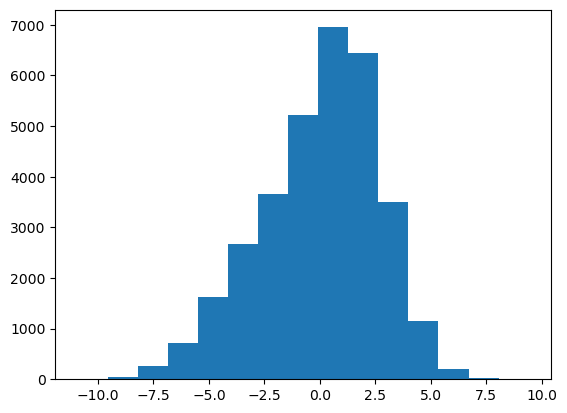

In [36]:
plt.hist(np.array(y_test), bins=15)

(array([1.3000e+01, 4.6000e+01, 4.5300e+02, 2.8190e+03, 8.8220e+03,
        2.0533e+04, 3.2338e+04, 4.7295e+04, 6.9963e+04, 6.9078e+04,
        3.2603e+04, 7.2100e+03, 1.0810e+03, 1.3800e+02, 1.8000e+01]),
 array([-13.04748825, -11.47119074,  -9.89489323,  -8.31859571,
         -6.7422982 ,  -5.16600068,  -3.58970317,  -2.01340566,
         -0.43710814,   1.13918937,   2.71548688,   4.2917844 ,
          5.86808191,   7.44437942,   9.02067694,  10.59697445]),
 <BarContainer object of 15 artists>)

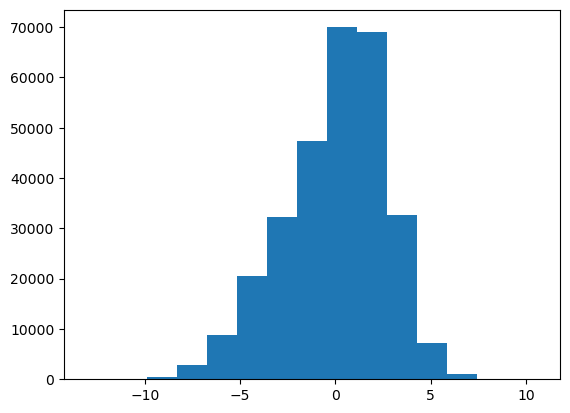

In [37]:
plt.hist(np.array(y_train), bins=15)

In [26]:
y_scaler = StandardScaler().fit(y_train)

In [27]:
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [28]:
y_train

array([[-2.72405039],
       [ 0.27171598],
       [ 0.16160475],
       ...,
       [ 0.34007836],
       [ 0.99518227],
       [-0.1185846 ]])

(array([5.000e+00, 4.900e+01, 2.620e+02, 7.160e+02, 1.615e+03, 2.680e+03,
        3.662e+03, 5.212e+03, 6.950e+03, 6.451e+03, 3.505e+03, 1.150e+03,
        2.090e+02, 3.500e+01, 8.000e+00]),
 array([-4.08490944, -3.57777056, -3.07063168, -2.5634928 , -2.05635392,
        -1.54921504, -1.04207616, -0.53493728, -0.0277984 ,  0.47934048,
         0.98647936,  1.49361824,  2.00075712,  2.507896  ,  3.01503488,
         3.52217376]),
 <BarContainer object of 15 artists>)

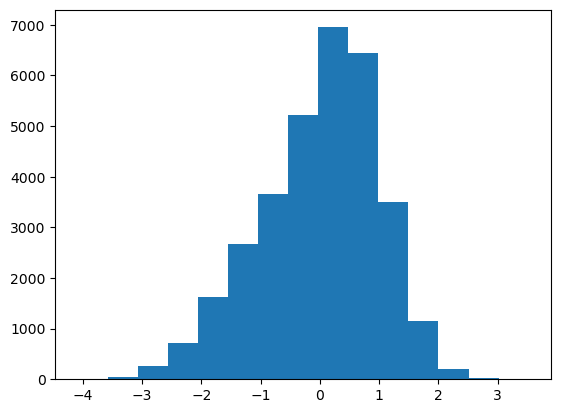

In [31]:
plt.hist(np.array(y_test), bins=15)

(array([1.3000e+01, 4.6000e+01, 4.5300e+02, 2.8190e+03, 8.8220e+03,
        2.0533e+04, 3.2338e+04, 4.7295e+04, 6.9963e+04, 6.9078e+04,
        3.2603e+04, 7.2100e+03, 1.0810e+03, 1.3800e+02, 1.8000e+01]),
 array([-4.88443601, -4.29433636, -3.70423672, -3.11413707, -2.52403743,
        -1.93393778, -1.34383813, -0.75373849, -0.16363884,  0.4264608 ,
         1.01656045,  1.60666009,  2.19675974,  2.78685939,  3.37695903,
         3.96705868]),
 <BarContainer object of 15 artists>)

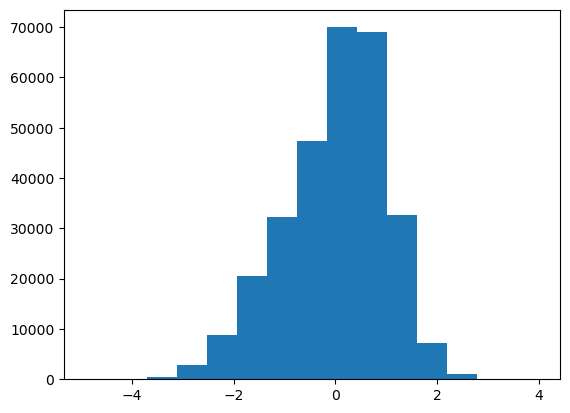

In [32]:
plt.hist(np.array(y_train), bins=15)

# Save

In [ ]:
print(
    "Dataset shapes \n",
    "X_train: ",X_train.shape,"\n",
    "X_test: ",X_test.shape,"\n",
    "y_train: ",y_train.shape,"\n",
    "y_test: ",y_test.shape,"\n",
)

In [ ]:
X_train.to_csv("data/X_train_8e-4.csv", index=False)
X_test.to_csv("data/X_test_8e-4.csv", index=False)
np.savetxt("data/y_train_8e-4.csv", y_train, delimiter=",")
np.savetxt("data/y_test_8e-4.csv", y_test, delimiter=",")